In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine the datasets
file_path_1 = './scrappeddata1.csv'
file_path_2 = './scrappeddata2.csv'

data1 = pd.read_csv(file_path_1)
data2 = pd.read_csv(file_path_2)

data = pd.concat([data1, data2], ignore_index=True)

In [3]:
# Remove unnecessary columns (keeping a few relevant ones for now)
relevant_columns = [
    'authorMeta/name', 'authorMeta/nickName', 'authorMeta/fans', 
    'authorMeta/heart', 'authorMeta/digg', 'authorMeta/following', 
    'text', 'webVideoUrl'
]

In [4]:
data = data[relevant_columns]

print(data)

# Handle missing values by filling with zero or empty strings where appropriate
data.fillna({'authorMeta/fans': 0, 'authorMeta/heart': 0, 'authorMeta/digg': 0, 
             'authorMeta/following': 0, 'text': ''}, inplace=True)

        authorMeta/name           authorMeta/nickName  authorMeta/fans  \
0       hermoneymastery             Her Money Mastery           327400   
1          yahoofinance                 Yahoo Finance           506900   
2        derwentfinance  Rhianna | Derwent Finance 🇦🇺            23200   
3     yournewaccountant             YourNewAccountant           391800   
4          andrewivx7.0       Andrew (advice account)           136400   
..                  ...                           ...              ...   
835            forextok                      Forextok               12   
836  traderfriend_micha            traderfriend_micha            25200   
837        cartoonguy__                    cartoonguy            21600   
838            rivan950                         Rivan            18200   
839        aisarkhaledd                  AisarKhaledd          8700000   

     authorMeta/heart  authorMeta/digg  authorMeta/following  \
0             2200000              449         

In [5]:
# Adding a total engagement metric (sum of likes and diggs)
data['totalEngagement'] = data['authorMeta/heart'] + data['authorMeta/digg']

# Filter data for influencers who primarily discuss forex trading
forex_keywords = ['forex', 'trading', 'forextrading', 'trader', 'fx']
forex_data = data[data['text'].astype(str).str.contains('|'.join(forex_keywords), case=False, na=False)]

# Summarize engagement metrics for these influencers
forex_engagement_summary = forex_data[['authorMeta/nickName', 'authorMeta/fans', 'totalEngagement']].groupby('authorMeta/nickName').mean().reset_index()

# Display the summarized engagement data for forex trading influencers
print(forex_engagement_summary)

   authorMeta/nickName  authorMeta/fans  totalEngagement
0         AisarKhaledd        8700000.0       86131800.0
1         Alves Trader           7273.0          58122.0
2             Amiin_fx          63100.0         904200.0
3                 Amoi          44800.0         170900.0
4     Angah trader B40           6104.0          17798.0
..                 ...              ...              ...
72   victoryvincent930           7152.0         105100.0
73        wiphalasNFTs           2964.0          23097.0
74              yannic           1005.0          62462.0
75    ป๊อก ล็อกกราฟ WN          20400.0          51345.0
76    เจ้าชายเทรดเดอร์          15000.0         746200.0

[77 rows x 3 columns]


C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\AppData\Local\Temp\ipykernel_3616\4038649434.py:20: UserWarning: Glyph 12349 (\N{PART ALTERNATION MARK}) missing from font(s) DejaVu Sans.
  plt.tight_la

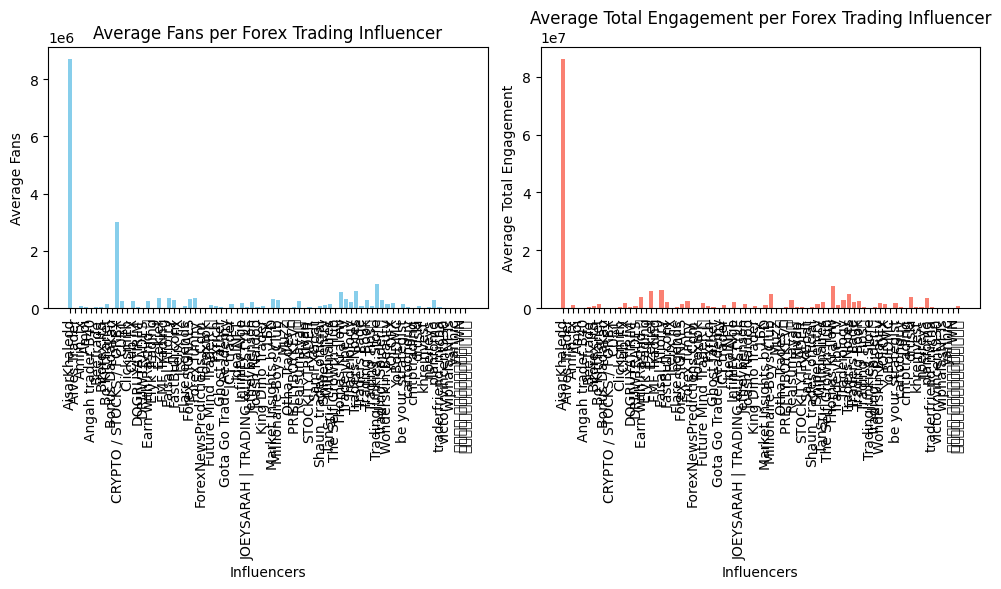

In [6]:

# Visualizing the engagement metrics for forex trading influencers
plt.figure(figsize=(10, 6))

# Bar plot for average fans
plt.subplot(1, 2, 1)
plt.bar(forex_engagement_summary['authorMeta/nickName'], forex_engagement_summary['authorMeta/fans'], color='skyblue')
plt.xlabel('Influencers')
plt.ylabel('Average Fans')
plt.title('Average Fans per Forex Trading Influencer')
plt.xticks(rotation=90)

# Bar plot for average total engagement
plt.subplot(1, 2, 2)
plt.bar(forex_engagement_summary['authorMeta/nickName'], forex_engagement_summary['totalEngagement'], color='salmon')
plt.xlabel('Influencers')
plt.ylabel('Average Total Engagement')
plt.title('Average Total Engagement per Forex Trading Influencer')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()